In [127]:
#The steps in solving a machine learning techniques
##1. Data Preprocessing
##2.Defining 'Error'
##3.splitting data into two parts : Training Data and Testing data
##Train the model
#Prediction

In [128]:
#import the numpy and pandas package
import pandas as pd
import numpy as np

#import data visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df1 = pd.read_csv("homeprices.csv")
#check the head of the dataset
df1.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,595000
4,4000,760000


In [130]:
df1.shape

(9, 2)

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    9 non-null      int64
 1   price   9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


In [132]:
df1.describe()

,area,price
count,9.000000,9.000000
mean,3800.000000,723400.000000
std,766.485486,142394.768162
min,2600.000000,550000.000000
25%,3200.000000,595000.000000
50%,4000.000000,760000.000000
75%,4200.000000,850400.000000
max,5000.000000,900000.000000


In [133]:
df1.columns

Index(['area', 'price'], dtype='object')

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


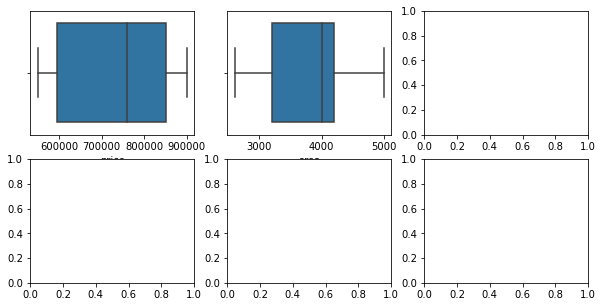

In [134]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize= (10,5))
plt1 = sns.boxplot(df1['price'], ax = axs[0,0])
plt2 = sns.boxplot(df1['area'], ax = axs[0,1])

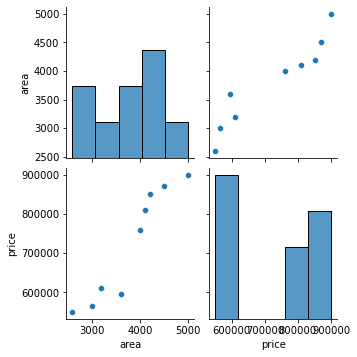

In [135]:
#Visualising Numeric Variables
sns.pairplot(df1)
plt.show()

<AxesSubplot:>

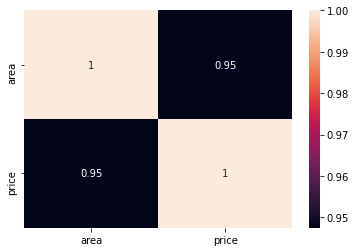

In [136]:
sns.heatmap(df1.corr(), annot=True)

In [137]:
df1['price_per_sqft']= df1['price']/ df1['area']

In [138]:
df1['price_per_sqft']

0    211.538462
1    188.333333
2    190.625000
3    165.277778
4    190.000000
5    197.560976
6    202.476190
7    193.377778
8    180.000000
Name: price_per_sqft, dtype: float64

In [139]:
df1.describe()

,area,price,price_per_sqft
count,9.000000,9.000000,9.000000
mean,3800.000000,723400.000000,191.021057
std,766.485486,142394.768162,13.196174
min,2600.000000,550000.000000,165.277778
25%,3200.000000,595000.000000,188.333333
50%,4000.000000,760000.000000,190.625000
75%,4200.000000,850400.000000,197.560976
max,5000.000000,900000.000000,211.538462


In [140]:
#Splitting the Data into Training and Testing Sets

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [142]:
X=df1.drop(columns=['price'])
y=df1['price']

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [144]:
print(X_train.shape)
print(X_test.shape)

(7, 2)
(2, 2)


In [145]:
#Apply linear regression
scaler = StandardScaler()
lr= LinearRegression(normalize=True)
pipe= make_pipeline(scaler, lr)
pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [146]:
y_pred_lr= pipe.predict(X_test)

In [147]:
r2_score(y_test, y_pred_lr)

0.9987122529075125

Text(0, 0.5, 'y_pred')

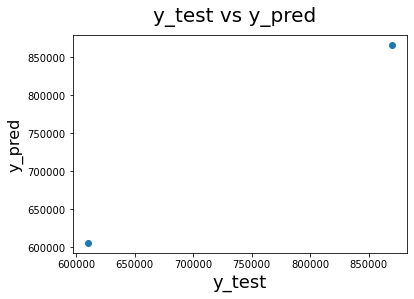

In [148]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lr)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [149]:
predictions = pipe.predict(X_test)

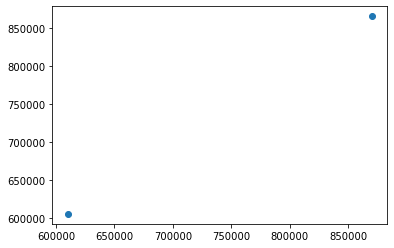

In [150]:
plt.scatter(y_test, predictions)

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


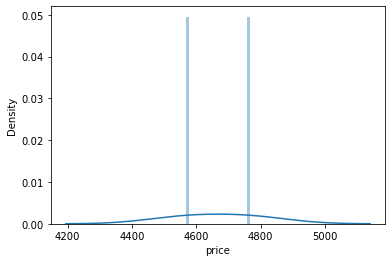

In [151]:
sns.distplot((y_test-predictions),bins=20);

In [162]:
pip install -U notebook-as-pdf